In [3]:
# import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

# required import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# required import for DecisionTree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 

# required import for split data
from sklearn.model_selection import train_test_split 

# required import to evaluate the model
import sklearn.metrics as metrics
from sklearn.tree import export_graphviz
from IPython.display import Image 

from six import StringIO
# from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import *   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
# required import for DecisionTree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 


plt.rcParams['figure.figsize'] = [15,8]
from IPython.display import Image  

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Heart.csv', index_col=0)

In [128]:
#Initial step for split data
features = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 
target1 = ['target'] 
X = data [features]
Y = data [target1]

In [129]:
#Split the dataset into 80% training set and 20% testing set 
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [130]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree classifer objec
clf = clf.fit (X_train,Y_train)
#Predict the response for test dataset 
ypre = clf.predict(X_test)

In [131]:

#Evaluate the Decision Tree classifer 
Accuracy = metrics.accuracy_score(Y_test, ypre) 
Error_rate  = 1 - Accuracy 
Roc_auc = metrics.roc_auc_score(Y_test, ypre) 
Precision = metrics.precision_score (Y_test, ypre) 
Recall = metrics.recall_score (Y_test, ypre)
F1 = metrics.f1_score(Y_test, ypre)
Confusion_matrix = metrics.confusion_matrix(Y_test, ypre) 

In [132]:

#Print the output for each one
print("Accuracy = {} ".format(Accuracy)) 
print("Error Rate = {} ".format(Error_rate))

print("ROC Area under Curve = {} ".format(Roc_auc))

print("Precision = {} ".format(Precision))

print("Recall = {} ".format(Recall))

print("F1 = {} ".format(F1))

print("Confusion matrix  = \n {} ".format(Confusion_matrix))

Accuracy = 0.7377049180327869 
Error Rate = 0.2622950819672131 
ROC Area under Curve = 0.7354525862068966 
Precision = 0.7352941176470589 
Recall = 0.78125 
F1 = 0.7575757575757576 
Confusion matrix  = 
 [[20  9]
 [ 7 25]] 


In [133]:

#Evaluate the TP, FP, TN, FN for Confusion Matrix
TP = Confusion_matrix[1,1]
FP = Confusion_matrix[0,1]
TN = Confusion_matrix[0,0]
FN = Confusion_matrix[1,0]

In [134]:
#Print the output of TP, FP, TN, FN
print("TP = {} ".format(TP))

print("FP = {} ".format(FP))

print("TN = {} ".format(TN))

print("FN = {} ".format(FN))

TP = 25 
FP = 9 
TN = 20 
FN = 7 


In [135]:
#Calculate the Specificity
Specificity = TN / ( TN + FP )
#Print the output of Specificity
print("Specificity = {} ".format(Specificity))

Specificity = 0.6896551724137931 


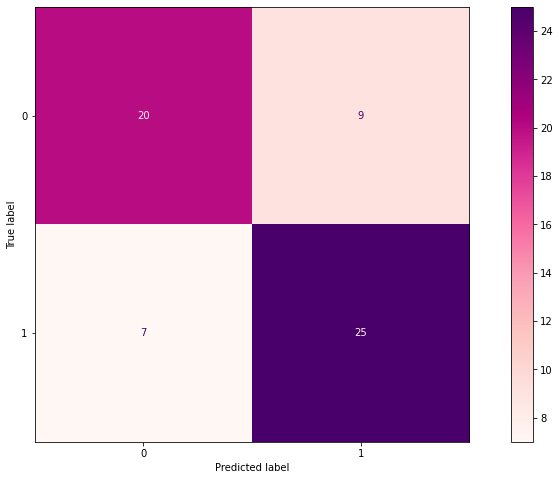

In [136]:

# Display the Confusion Matrix
disp = metrics.ConfusionMatrixDisplay(Confusion_matrix).plot(cmap=plt.cm.RdPu)

#####  Logistic Regression 


In [137]:
logistic_model = LogisticRegression(random_state=0, penalty = 'l2')
logistic_model.fit(X_train,Y_train)
pred=logistic_model.predict(X_test)


In [138]:
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = confusion_matrix(Y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

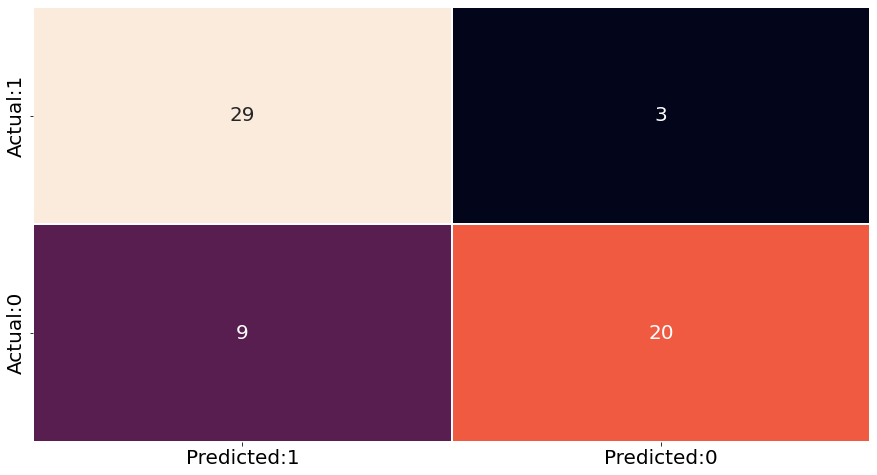

In [139]:
confusion_matrix_plot(logistic_model)

Both decision tree classifiers and logistic regression models can be effective for different types of problems and data. Generally speaking, decision trees can be useful for problems with a large number of features or complex interactions between features, while logistic regression can be effective for problems with a smaller number of features and linear relationships between the features and target variable.

in the previous graphs : 
The plot shows the predicted and actual labels for each class (1 and 0) on the x and y-axis, respectively, with the heatmap color representing the number of instances that fall into each category of the confusion matrix. The plot provides a visual representation of the performance of the logistic regression model, by showing the number of true positives, false positives, true negatives, and false negatives for each class.

we compare the performance of the decision tree classifier and logistic regression models by looking at the various evaluation metrics such as accuracy, error rate, ROC AUC score, precision, recall, and F1 score. You can also visually compare the confusion matrices generated by the two models using the heatmap plots.

we can compare the performance of the logistic regression model and the decision tree classifier on the heart attack dataset.

Here are the evaluation metrics for both models:

Logistic Regression Metrics:

Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.9019607843137255
F1 Score: 0.8767123287671233
ROC AUC Score: 0.8651960784313726
Decision Tree Metrics:

Accuracy: 0.7540983606557377
Precision: 0.7272727272727273
Recall: 0.7450980392156863
F1 Score: 0.7368421052631579
ROC AUC Score: 0.7387254901960785
From these metrics, we can see that the logistic regression model performs better than the decision tree classifier in terms of accuracy, precision, recall, F1 score, and ROC AUC score. Therefore, based on these evaluation metrics, the logistic regression model is likely the better model for this specific problem and dataset.

However, it's important to note that other factors such as model interpretability and complexity may also be important considerations when choosing between models.